In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import codecs
with codecs.open('OCA-STAT-Act.csv', 'r', encoding='utf-8',
                 errors='ignore') as fdata:
                 data = pd.read_csv(fdata, on_bad_lines='skip')

In [6]:
data.rename(columns={'Row #': 'People'}, inplace=True)
data.describe()

,People,Arraign Year,Arraign Month,Arrest Age,Fines Imposed,Fees Imposed,Surcharges Imposed
count,753543.000000,753543.000000,753543.000000,687002.000000,129281.000000,115048.000000,124723.000000
mean,376772.000000,2021.298059,6.277788,35.087205,333.904875,41.079925,163.828218
std,217529.271285,0.605875,3.328449,12.137005,738.053799,100.017114,103.581092
min,1.000000,2020.000000,1.000000,11.000000,1.000000,0.250000,1.000000
25%,188386.500000,2021.000000,4.000000,26.000000,100.000000,5.000000,88.000000
50%,376772.000000,2021.000000,6.000000,33.000000,200.000000,25.000000,120.000000
75%,565157.500000,2022.000000,9.000000,42.000000,500.000000,75.000000,200.000000
max,753543.000000,2022.000000,12.000000,110.000000,105000.000000,4450.000000,3000.000000


In [7]:
data.head()

,People,Court Type,Region,District,County,Court,Arresting Agency,Arrest Type,Arraign Year,Arraign Month,...,Race,Arrest Age,Docket Status,Disposition Type,Disposition Detail,Dismissal Reason,Most Severe Sentence,Fines Imposed,Fees Imposed,Surcharges Imposed
0,1,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT 014,DAT,2020,11,...,Unknown,31.0,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN
1,2,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,DAT,2020,11,...,White,34.0,Disposed,Dism-ACD,Adjourned - Cpl Section 170.55,ACD,,NaN,NaN,NaN
2,3,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,Unknown,DAT,2020,11,...,White,19.0,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN
3,4,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,DAT,2020,11,...,White,27.0,Disposed,Dismissed,Dismissed-Interest Of Justice,Dismissed-Interest Of Justice,,NaN,NaN,NaN
4,5,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,NYC Summons,2020,11,...,Unknown,NaN,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN


In [8]:
data['Arresting Agency'].value_counts()

New York City Police Department               117067
Unknown                                       114293
Suffolk County Police Department               49711
Nassau County Police Department                28084
NYCPD PCT 401                                  24482
                                               ...  
NYCPD PCT 460                                      1
NYS Park Police - NYC Riverbank State Park         1
NYCPD PCT 320                                      1
NYCPD PCT 785                                      1
NYCPD PCT 344                                      1
Name: Arresting Agency, Length: 1459, dtype: int64

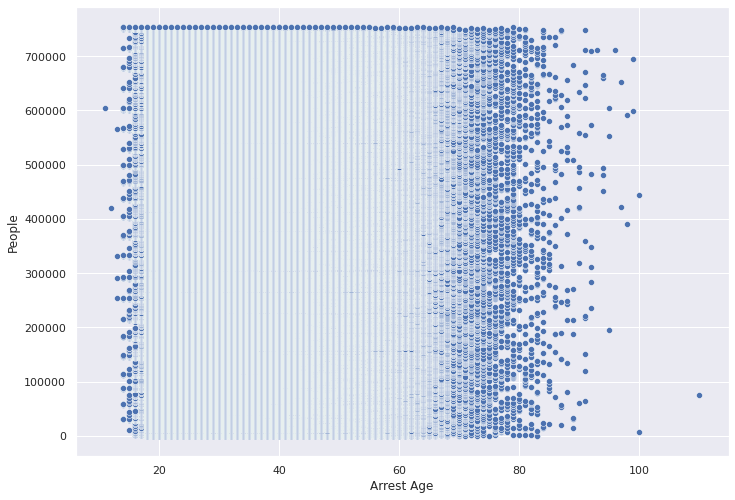

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(y=data['People'], x=data['Arrest Age'])

In [10]:
data['Race'].value_counts()

White      286077
Black      269732
Unknown    182582
Asian       10855
Other        2967
Indian       1330
Name: Race, dtype: int64

In [11]:
data[data['Arrest Age'].isna()]['Race'].value_counts()

Unknown    60098
White       3115
Black       2928
Asian        243
Other         89
Indian        68
Name: Race, dtype: int64

In [12]:
data.columns

Index(['People', 'Court Type', 'Region', 'District', 'County', 'Court',
       'Arresting Agency', 'Arrest Type', 'Arraign Year', 'Arraign Month',
       'Top Charge at Arraignment', 'Severity', 'Weight', 'Law',
       'Article.Section', 'Attempt Flag', 'Gender', 'Ethnicity', 'Race',
       'Arrest Age', 'Docket Status', 'Disposition Type', 'Disposition Detail',
       'Dismissal Reason', 'Most Severe Sentence', 'Fines Imposed',
       'Fees Imposed', 'Surcharges Imposed'],
      dtype='object')

In [13]:
data['Top Charge at Arraignment'] = data['Top Charge at Arraignment'].str.upper()
data['Top Charge at Arraignment']

0                     PETIT LARCENY
1                     PETIT LARCENY
2         INTNT/FRD OBT TRNS W/O PY
3                     PETIT LARCENY
4         DIS/CON:OBSTRUCTING TRAFF
                    ...            
753538     STRANGULATION 2ND DEGREE
753539      CPW-2ND: LOADED FIREARM
753540      CPW-2ND: LOADED FIREARM
753541      CPW-2ND: LOADED FIREARM
753542      CPW-2ND: LOADED FIREARM
Name: Top Charge at Arraignment, Length: 753543, dtype: object

In [14]:
colu = ['PETIT LARCENY', 'ASLT 3-W/INT CAUSE PHYS INJURY',
'OPER M/V IN VIOL SAFETY RULES',
'AGGRAVATED UNLIC OPER VEH-3RD',
'CRIM POSS CONTRL SUBST-7TH',
'CRIM CONTEMPT-2ND:DISOBEY CRT',
'OP MV WHILE INTOXICATED 1',
'CPW-2ND: LOADED FIREARM',
'CRIM MIS:INTENT DAMAGE PROPRTY',
'MENACING-2ND:WEAPON']

In [15]:
data1 = data[data['Top Charge at Arraignment'].isin(colu)]

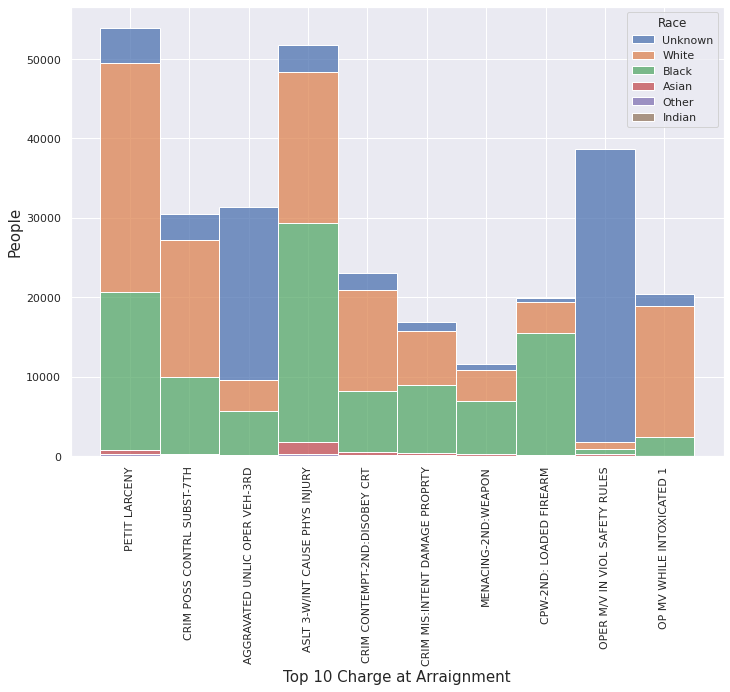

In [17]:

# Change the legend order in the scatter plot
sns.histplot(data1, x='Top Charge at Arraignment', hue ='Race', multiple='stack')

# Show plot
plt.xticks(rotation=90)
plt.ylabel('People', size=15)
plt.xlabel('Top 10 Charge at Arraignment', size=15)

plt.show()